In [1]:
import sqlite3
import pandas as pd

In [2]:
con = sqlite3.connect("/scratch/ssd004/datasets/cellxgene/3d_molecule_data/chembl/original_data/chembl_34/chembl_34_sqlite/chembl_34.db")
cursor = con.cursor()

query = """
SELECT cs.canonical_smiles, cp.cx_most_apka, cp.cx_most_bpka, cp.full_mwt, cp.cx_logp, cp.cx_logd
FROM compound_structures cs
JOIN compound_properties cp ON cs.molregno = cp.molregno
"""
# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

In [3]:
# Execute the query
cursor.execute(query)

# Fetch and print the results
results = cursor.fetchall()
for row in results:
    print(f"SMILES: {row[0]}, max_apka: {row[1]}, min_bpka: {row[2]}")
    break

SMILES: Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl, max_apka: 6.48, min_bpka: None


In [4]:
def process_pka(most_apka, most_bpka):
    if most_apka is None and most_bpka is None:
        return None
    if most_apka is None:
        return (most_bpka, most_bpka)
    if most_bpka is None:
        return (most_apka, most_apka)
    return (most_apka, most_bpka)
    

In [7]:
# Process the results
res_lst = []
for row in results:
    smiles, most_apka, most_bpka, full_mwt, logp, logd = row
    processed_pka = process_pka(most_apka, most_bpka)
    if processed_pka or logp or logd:
        res_lst.append({
            "smiles": smiles,
            "most_apka": processed_pka[0] if processed_pka else None,
            "most_bpka": processed_pka[1] if processed_pka else None,
            "full_mwt": full_mwt,
            "logp": logp if logp else None,
            "logd": logd if logd else None
        })

In [8]:
df = pd.DataFrame(res_lst)
df.head()

,smiles,most_apka,most_bpka,full_mwt,logp,logd
0,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl,6.48,6.48,341.75,3.63,2.69
1,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1,6.33,6.33,332.32,2.88,1.82
2,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1,6.33,6.33,357.80,3.70,2.64
3,Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1,6.33,6.33,307.31,3.02,1.97
4,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1,6.33,6.33,341.75,3.63,2.57


In [9]:
# save as csv
df.to_csv("/scratch/ssd004/datasets/cellxgene/3d_molecule_data/chembl/original_data/chembl_34_molecular_property.csv", index=False)

<Axes: xlabel='most_apka', ylabel='Count'>

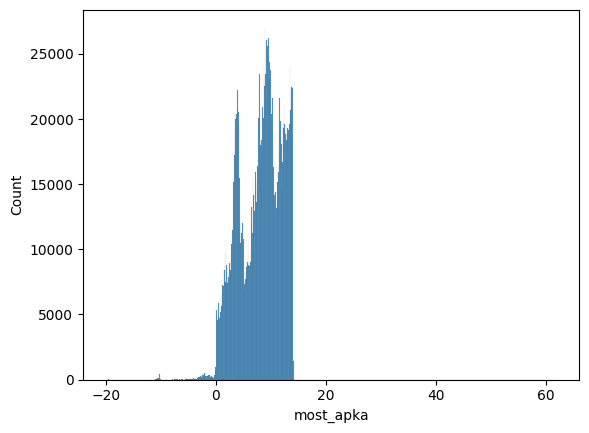

In [10]:
# eda
import seaborn as sns

sns.histplot(df["most_apka"])

<Axes: xlabel='most_bpka', ylabel='Count'>

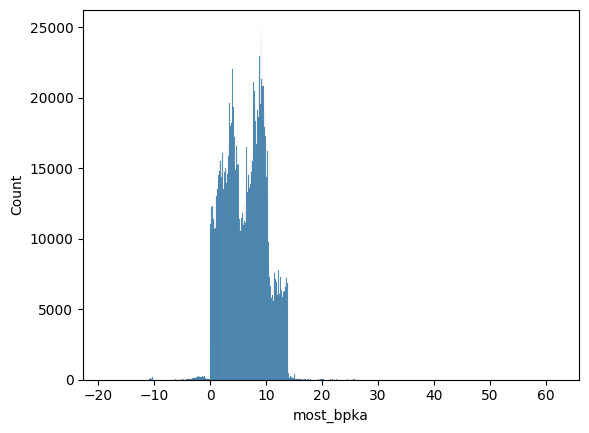

In [11]:
sns.histplot(df["most_bpka"])

/tmp/ipykernel_14362/427011059.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["most_apka"], shade=True)
/tmp/ipykernel_14362/427011059.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["most_bpka"], shade=True)


<Axes: xlabel='most_apka', ylabel='Density'>

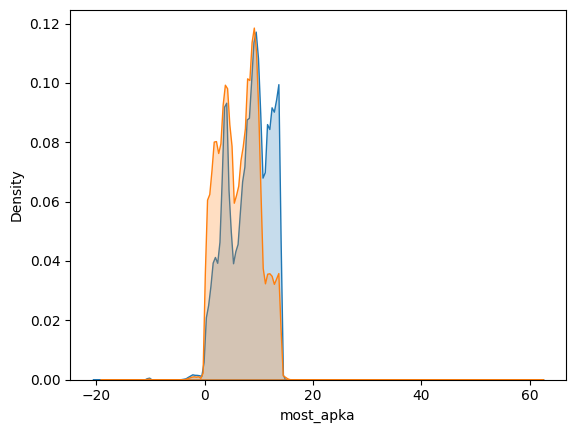

In [12]:
# overlapped density plot
sns.kdeplot(df["most_apka"], shade=True)
sns.kdeplot(df["most_bpka"], shade=True)

<Axes: xlabel='logp', ylabel='Count'>

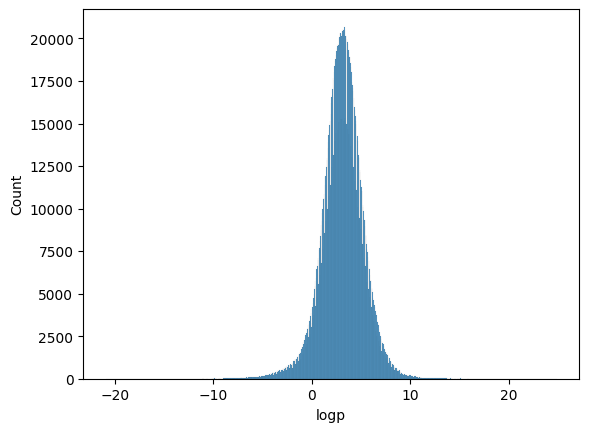

In [14]:
sns.histplot(df["logp"])

<Axes: xlabel='logd', ylabel='Count'>

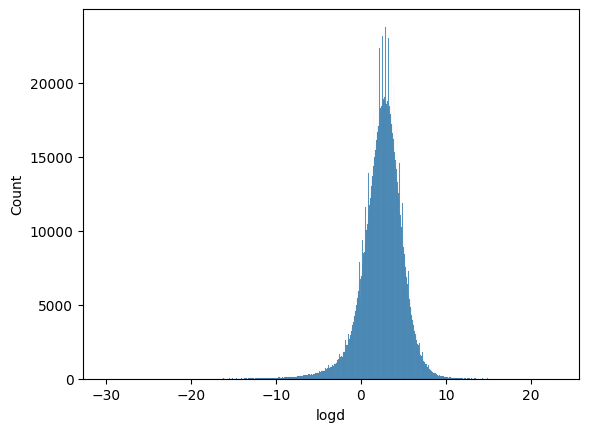

In [15]:
sns.histplot(df["logd"])

In [16]:
len(df)

2346505